*   **Notebook for Group 2's Final Year Project"s Data Analysis/Machine Learning Component**
*   **Computer Science Department, School of Computing and Engineering Sciences, Babcock University, Ilishan-Remo, Ogun State, Nigeria.**

*   **Group 2 Members:**

1.   **Ogunsusi**, Adetunji Gabriel 19/2500
2.   **Okoye**, Adaora Jessica 19/0686

Group Project Supervisor: **Ernest E. Onuiri, PHD**

## Importing Libraries

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time
import warnings
warnings.filterwarnings("ignore")

## Data Preprocessing

In [25]:
df = pd.read_csv('data.csv')

In [26]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [28]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [29]:
df.shape

(569, 33)

In [30]:
df = df.dropna(axis=1)

In [31]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Exploratory Data Analysis

In [33]:
df.head(20).style.background_gradient(cmap='Blues')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,1.095000,0.905300,8.589000,153.400000,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900
1,842517,M,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,0.543500,0.733900,3.398000,74.080000,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020
2,84300903,M,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,0.745600,0.786900,4.585000,94.030000,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580
3,84348301,M,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,0.495600,1.156000,3.445000,27.230000,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000
4,84358402,M,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,0.757200,0.781300,5.438000,94.440000,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780
5,843786,M,12.450000,15.700000,82.570000,477.100000,0.127800,0.170000,0.157800,0.080890,0.208700,0.076130,0.334500,0.890200,2.217000,27.190000,0.007510,0.033450,0.036720,0.011370,0.021650,0.005082,15.470000,23.750000,103.400000,741.600000,0.179100,0.524900,0.535500,0.174100,0.398500,0.124400
6,844359,M,18.250000,19.980000,119.600000,1040.000000,0.094630,0.109000,0.112700,0.074000,0.179400,0.057420,0.446700,0.773200,3.180000,53.910000,0.004314,0.013820,0.022540,0.010390,0.013690,0.002179,22.880000,27.660000,153.200000,1606.000000,0.144200,0.257600,0.378400,0.193200,0.306300,0.083680
7,84458202,M,13.710000,20.830000,90.200000,577.900000,0.118900,0.164500,0.093660,0.059850,0.219600,0.074510,0.583500,1.377000,3.856000,50.960000,0.008805,0.030290,0.024880,0.014480,0.014860,0.005412,17.060000,28.140000,110.600000,897.000000,0.165400,0.368200,0.267800,0.155600,0.319600,0.115100
8,844981,M,13.000000,21.820000,87.500000,519.800000,0.127300,0.193200,0.185900,0.093530,0.235000,0.073890,0.306300,1.002000,2.406000,24.320000,0.005731,0.035020,0.035530,0.012260,0.021430,0.003749,15.490000,30.730000,106.200000,739.300000,0.170300,0.540100,0.539000,0.206000,0.437800,0.107200
9,84501001,M,12.460000,24.040000,83.970000,475.900000,0.118600,0.239600,0.227300,0.085430,0.203000,0.082430,0.297600,1.599000,2.039000,23.940000,0.007149,0.072170,0.077430,0.014320,0.017890,0.010080,15.090000,40.680000,97.650000,711.400000,0.185300,1.058000,1.105000,0.221000,0.436600,0.207500


In [34]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [35]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [36]:
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

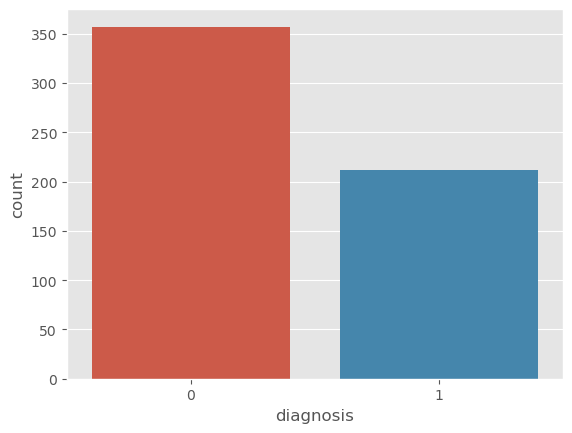

In [37]:
sns.countplot(x='diagnosis', data=df)

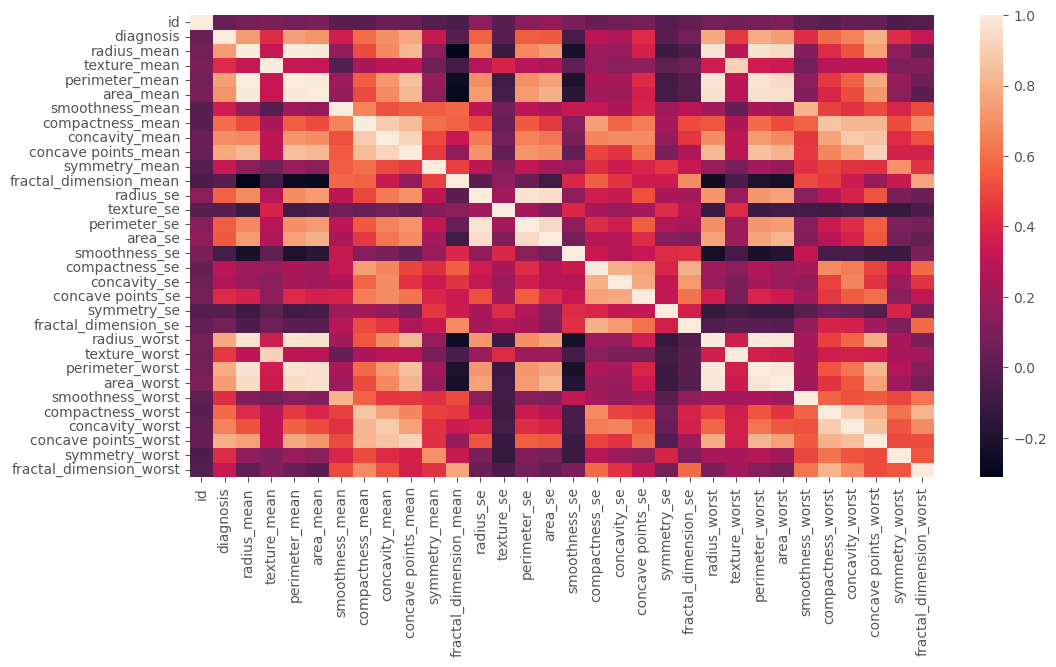

In [38]:
plt.figure(figsize = (12, 6), dpi = 100)
sns.heatmap(df.corr());

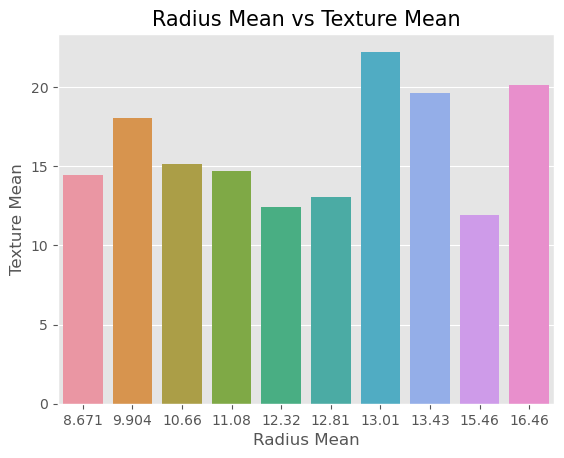

In [39]:
sns.barplot(x="radius_mean", y="texture_mean", data=df[170:180])
plt.title("Radius Mean vs Texture Mean",fontsize=15)
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.show()
plt.style.use("ggplot")

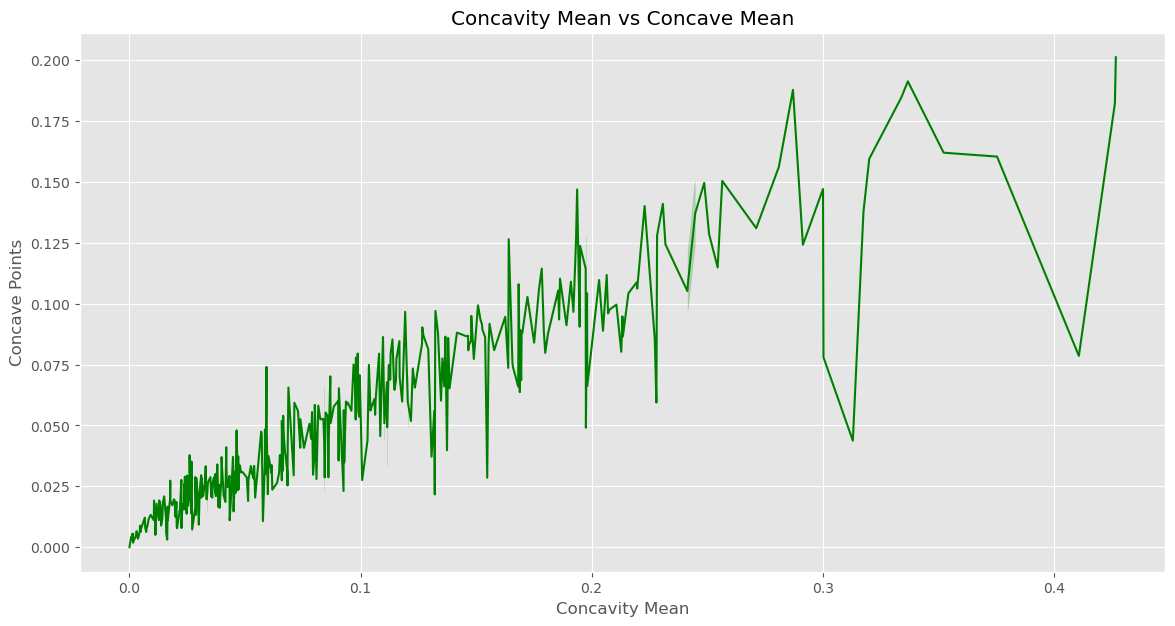

In [40]:
plt.figure(figsize=(14,7))
sns.lineplot(x = "concavity_mean",y = "concave points_mean",data = df[0:400], color='green')
plt.title("Concavity Mean vs Concave Mean")
plt.xlabel("Concavity Mean")
plt.ylabel("Concave Points")
plt.show()

## Training The Model

In [41]:
X = df.drop("diagnosis", axis=1)
Y = df["diagnosis"]
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=21)

In [42]:
models_list = []
models_list.append(('CART', DecisionTreeClassifier()))
models_list.append(('SVM', SVC())) 
models_list.append(('NB', GaussianNB()))
models_list.append(('KNN', KNeighborsClassifier()))

In [43]:
num_folds = 10
results = []
names = []

for name, model in models_list:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=123)
    start = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))


CART: 0.925121 (0.039624) (run time: 0.327191)
SVM: 0.615266 (0.072432) (run time: 0.332235)
NB: 0.619614 (0.070578) (run time: 0.092447)
KNN: 0.766908 (0.023521) (run time: 0.199189)


In [44]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.model_selection import cross_val_predict

results = []
names = []
train_scores = []
test_scores = []
f1_scores = []
recall_scores = []
precision_scores = []
roc_auc_scores = []

for name, model in models_list:
    # fit the model on the training data
    model.fit(X_train, Y_train)
    
    # make predictions on the training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # calculate the evaluation metrics
    train_score = accuracy_score(Y_train, y_train_pred)
    test_score = accuracy_score(Y_test, y_test_pred)
    f1 = f1_score(Y_test, y_test_pred)
    recall = recall_score(Y_test, y_test_pred)
    precision = precision_score(Y_test, y_test_pred)
    roc_auc = roc_auc_score(Y_test, y_test_pred)
    
    # store the results in lists
    train_scores.append(train_score)
    test_scores.append(test_score)
    f1_scores.append(f1)
    recall_scores.append(recall)
    precision_scores.append(precision)
    roc_auc_scores.append(roc_auc)
    names.append(name)

# convert the accuracy scores to percentages
train_scores = [score * 100 for score in train_scores]
test_scores = [score * 100 for score in test_scores]    
    
# create a table of the results
import pandas as pd
results_df = pd.DataFrame({
    'Model': names,
    'Train Score': train_scores,
    'Test Accuracy': test_scores,
    'F1 Score': f1_scores,
    'Recall': recall_scores,
    'Precision': precision_scores,
    'ROC AUC': roc_auc_scores
})
results_df.head()


,Model,Train Score,Test Accuracy,F1 Score,Recall,Precision,ROC AUC
0,CART,100.000000,94.736842,0.925000,0.948718,0.902439,0.947692
1,SVM,61.978022,65.789474,0.000000,0.000000,0.000000,0.500000
2,NB,61.978022,64.912281,0.000000,0.000000,0.000000,0.493333
3,KNN,85.054945,72.807018,0.491803,0.384615,0.681818,0.645641


### Evaluation of algorithm on Standardised Data
The performance of the few machine learning algorithm could be improved if a standardised dataset is being used. The improvement is likely for all the models. I will use pipelines that standardize the data and build the model for each fold in the cross-validation test harness. That way we can get a fair estimation of how each model with standardized data might perform on unseen data.

In [45]:
import warnings

# Standardize the dataset
pipelines = []

pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
                                                                        DecisionTreeClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC( ))])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
                                                                      GaussianNB())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
                                                                       KNeighborsClassifier())])))
results = []
names = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=num_folds,shuffle=True, random_state=123)
    for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

ScaledCART: 0.933961 (0.032580) (run time: 0.312250)
ScaledSVM: 0.966957 (0.029910) (run time: 0.252154)
ScaledNB: 0.929565 (0.038096) (run time: 0.125877)
ScaledKNN: 0.953865 (0.030209) (run time: 0.286186)


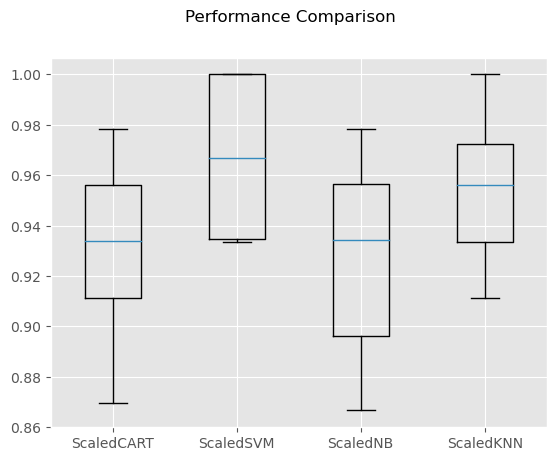

In [46]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Algorithm Tuning - Tuning SVM¶
We will focus on SVM for the algorithm tuning. We can tune two key parameter of the SVM algorithm - the value of C and the type of kernel. The default C for SVM is 1.0 and the kernel is Radial Basis Function (RBF). We will use the grid search method using 10-fold cross-validation with a standardized copy of the sample training dataset. We will try over a combination of C values and the following kernel types 'linear', 'poly', 'rbf' and 'sigmoid

In [47]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds,shuffle=True, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.969130 using {'C': 1.5, 'kernel': 'rbf'}
0.966957 (0.022820) with: {'C': 0.1, 'kernel': 'linear'}
0.821884 (0.050625) with: {'C': 0.1, 'kernel': 'poly'}
0.940628 (0.035553) with: {'C': 0.1, 'kernel': 'rbf'}
0.949420 (0.029770) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.964734 (0.017877) with: {'C': 0.3, 'kernel': 'linear'}
0.863671 (0.033922) with: {'C': 0.3, 'kernel': 'poly'}
0.953816 (0.024948) with: {'C': 0.3, 'kernel': 'rbf'}
0.960435 (0.027652) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.964686 (0.017960) with: {'C': 0.5, 'kernel': 'linear'}
0.878986 (0.030482) with: {'C': 0.5, 'kernel': 'poly'}
0.962560 (0.026103) with: {'C': 0.5, 'kernel': 'rbf'}
0.953816 (0.036422) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.964686 (0.017960) with: {'C': 0.7, 'kernel': 'linear'}
0.887874 (0.032034) with: {'C': 0.7, 'kernel': 'poly'}
0.962609 (0.027882) with: {'C': 0.7, 'kernel': 'rbf'}
0.949372 (0.037227) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.962512 (0.017495) with: {'C': 0.9, 'kernel': 'linear'

We can see the most accurate configuration was SVM with an RBF kernel and C=1.5, with the accuracy of 96.91%.

### Application of SVC on dataset
Let's fit the SVM to the dataset and see how it performs given the test data.

In [48]:
# prepare the model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
  
X_train_scaled = scaler.transform(X_train)
model = SVC(C=2.0, kernel='rbf')
start = time.time()
model.fit(X_train_scaled, Y_train)
end = time.time()
# Save preprocessor object to file
print( "Run Time: %f" % (end-start))


Run Time: 0.015483


In [49]:
# estimate accuracy on test dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)

In [50]:
print("Accuracy score %f" % accuracy_score(Y_test, predictions))
print(classification_report(Y_test, predictions))

Accuracy score 0.982456
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        75
           1       0.97      0.97      0.97        39

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



<AxesSubplot:>

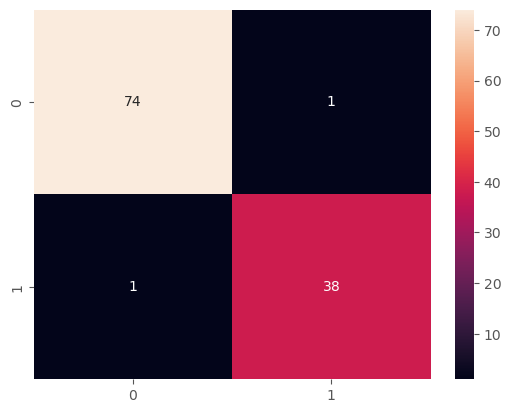

In [51]:
cm =confusion_matrix(Y_test, predictions)
sns.heatmap(cm,annot=True)

## Saving The Model

In [52]:
import pickle

# Train the SVM model on the training data
svm_model = SVC()
svm_model.fit(X_train, Y_train)

# Save the model to disk
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)


In [53]:

# Get the list of all column names from headers
column_headers = list(df.columns.values)
for i in column_headers:
    print(i)

id
diagnosis
radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst
